In [16]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [18]:
df.Category.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [19]:
Ultrabook = df.loc[df['Category'] == 'Ultrabook']
Notebook = df.loc[df['Category'] == 'Notebook']
Netbook = df.loc[df['Category'] == 'Netbook']
Gaming = df.loc[df['Category'] == 'Gaming']
Convertible = df.loc[df['Category'] == '2 in 1 Convertible']
Workstation = df.loc[df['Category'] == 'Workstation']

In [20]:
def getSSE(prediction, fact):
    total = 0
    for i in range(len(prediction)):
        temp = (prediction[i] - fact[i])**2
        total += temp
    return total

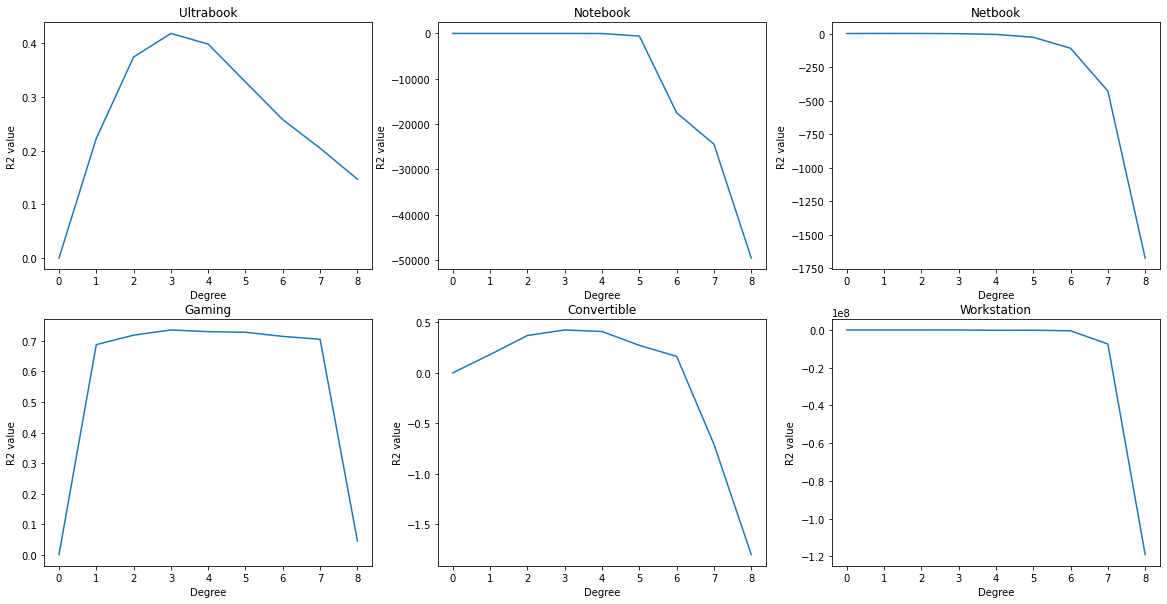

In [21]:
def findDegree(dfs, names):
    plt.figure(1, figsize=(20,10))
    for j in range(len(dfs)):
        results = [0]
        x = dfs[j][['RAM', 'fullRes', 'Clockspeed']].values
        y = dfs[j]['Price (Euros)'].values
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2201798761)
        for i in range(1, 9):
            model = make_pipeline(PolynomialFeatures(i), LinearRegression())
            model.fit(x_train, y_train)
            pred = model.predict(x_test)
            results.append(r2_score(y_test, pred))
        plt.subplot(2,3,j+1)
        plt.title(names[j])
        plt.xlabel("Degree")
        plt.ylabel("R2 value")
        plt.plot(results)
    plt.show()
findDegree([Ultrabook, Notebook, Netbook, Gaming, Convertible, Workstation],["Ultrabook", "Notebook", "Netbook", "Gaming", "Convertible", "Workstation"])

In [22]:
def plotResults(df, name, y, x_test, y_test, pred):
    plt.figure(1, figsize=(20,10))
    plt.subplot(231)
    plt.scatter(df['RAM'], y)
    plt.title('RAM vs Price (All ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(232)
    plt.scatter(df['fullRes'], y)
    plt.title('fullRes vs Price (All ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(233)
    plt.scatter(df['Clockspeed'], y)
    plt.title('Clockspeed vs Price (All ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.subplot(234)
    plt.scatter([i[0] for i in x_test],y_test, c='red')
    plt.scatter([i[0] for i in x_test],pred)
    plt.title('RAM vs Price (Test ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(235)
    plt.scatter([i[1] for i in x_test],y_test, c='red')
    plt.scatter([i[1] for i in x_test],pred)
    plt.title('fullRes vs Price (Test ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(236)
    plt.scatter([i[2] for i in x_test],y_test, c='red')
    plt.scatter([i[2] for i in x_test],pred)
    plt.title('Clockspeed vs Price (Test ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.show()

In [23]:
results = pd.DataFrame(columns=("Category","MSE", "SSE", "R2"))

MSE           SSE           R2           
141696.313077 8360082.471515 0.418513    


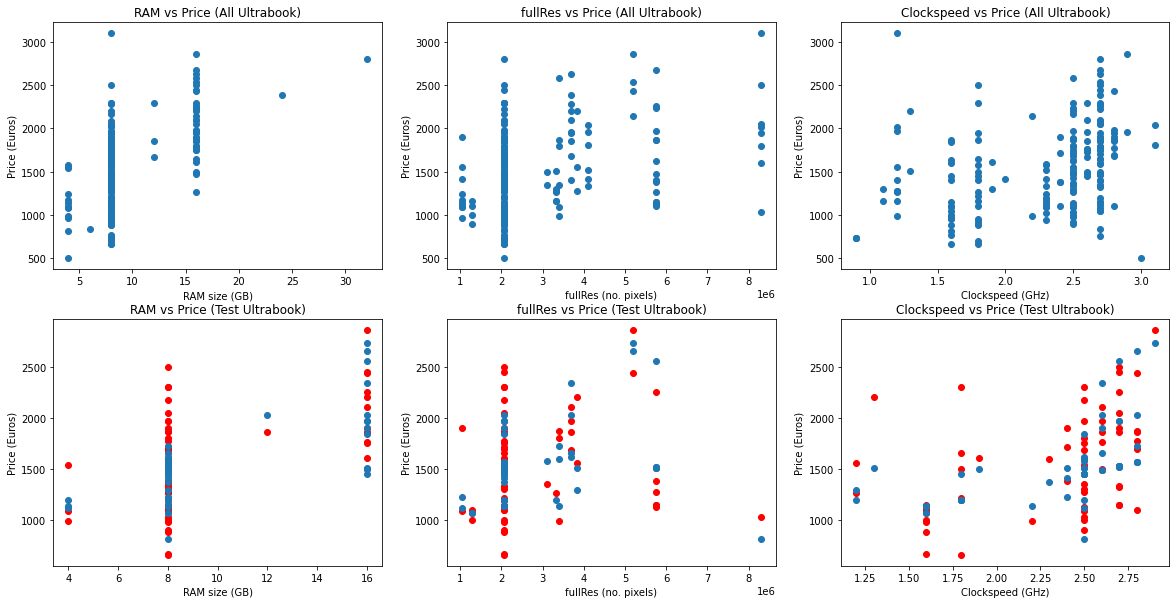

,Category,MSE,SSE,R2
0,Ultrabook,141696.313077,8.360082e+06,0.418513


In [24]:
# Ultrabook
ultra_x = Ultrabook[['RAM', 'fullRes', 'Clockspeed']].values
ultra_y = Ultrabook['Price (Euros)'].values
ultra_x_train, ultra_x_test, ultra_y_train, ultra_y_test = train_test_split(ultra_x, ultra_y, test_size = 0.3, random_state = 2201798761)
degree = 3
ultra_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
ultra_model.fit(ultra_x_train, ultra_y_train)

ultra_pred = ultra_model.predict(ultra_x_test)
ultra_mse = mean_squared_error(ultra_y_test, ultra_pred)
ultra_sse = getSSE(ultra_pred, ultra_y_test)
ultra_r2 = r2_score(ultra_y_test, ultra_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(ultra_mse), '{:12f}'.format(ultra_sse), '{:<12f}'.format(ultra_r2))

plotResults(Ultrabook, "Ultrabook", ultra_y, ultra_x_test, ultra_y_test, ultra_pred)
append = pd.DataFrame({"Category":["Ultrabook"], "MSE":[ultra_mse], "SSE":[ultra_sse], "R2":[ultra_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
257636.618864 56422419.531139 0.040150    


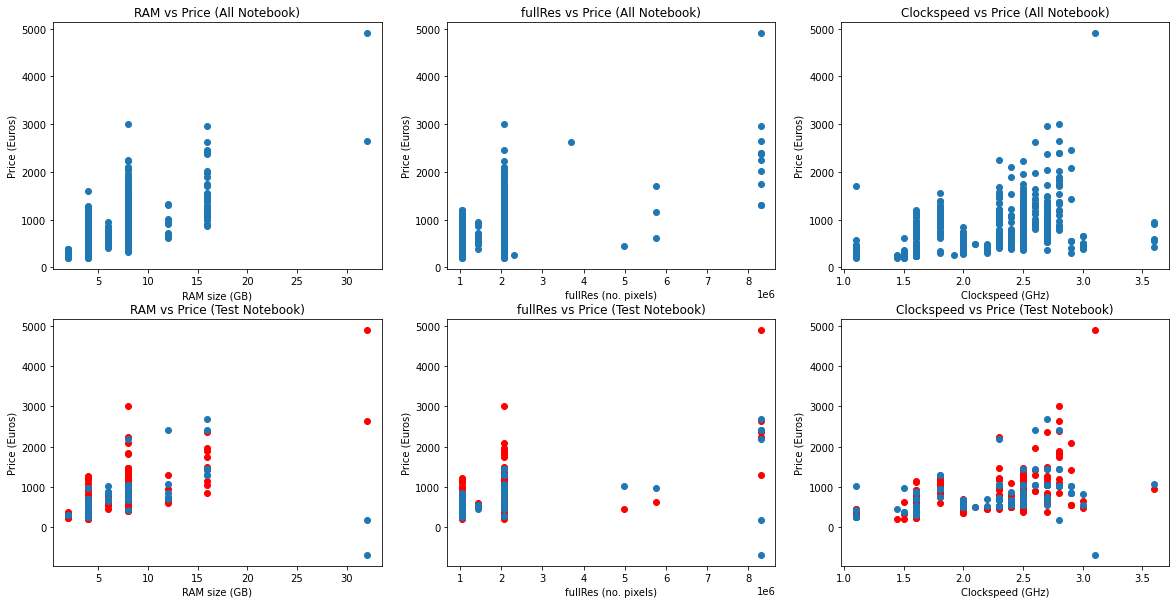

,Category,MSE,SSE,R2
0,Ultrabook,141696.313077,8.360082e+06,0.418513
1,Notebook,257636.618864,5.642242e+07,0.040150


In [25]:
# Notebook
note_x = Notebook[['RAM', 'fullRes', 'Clockspeed']].values
note_y = Notebook['Price (Euros)'].values
note_x_train, note_x_test, note_y_train, note_y_test = train_test_split(note_x, note_y, test_size = 0.3, random_state = 2201798761)
degree = 3
note_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
note_model.fit(note_x_train, note_y_train)

note_pred = note_model.predict(note_x_test)
note_mse = mean_squared_error(note_y_test, note_pred)
note_sse = getSSE(note_pred, note_y_test)
note_r2 = r2_score(note_y_test, note_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(note_mse), '{:12f}'.format(note_sse), '{:<12f}'.format(note_r2))

plotResults(Notebook, "Notebook", note_y, note_x_test, note_y_test, note_pred)
append = pd.DataFrame({"Category":["Notebook"], "MSE":[note_mse], "SSE":[note_sse], "R2":[note_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
428464.306207 3427714.449654 -1.062109   


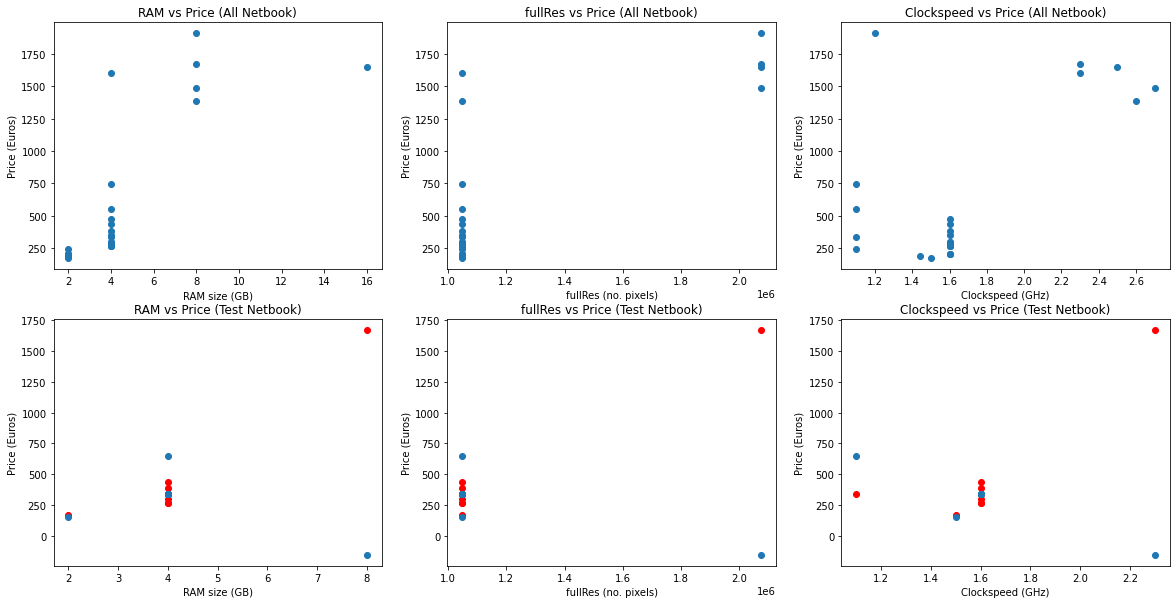

,Category,MSE,SSE,R2
0,Ultrabook,141696.313077,8.360082e+06,0.418513
1,Notebook,257636.618864,5.642242e+07,0.040150
2,Netbook,428464.306207,3.427714e+06,-1.062109


In [26]:
# Netbook
net_x = Netbook[['RAM', 'fullRes', 'Clockspeed']].values
net_y = Netbook['Price (Euros)'].values
net_x_train, net_x_test, net_y_train, net_y_test = train_test_split(net_x, net_y, test_size = 0.3, random_state = 2201798761)
degree = 3
net_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
net_model.fit(net_x_train, net_y_train)

net_pred = net_model.predict(net_x_test)
net_mse = mean_squared_error(net_y_test, net_pred)
net_sse = getSSE(net_pred, net_y_test)
net_r2 = r2_score(net_y_test, net_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(net_mse), '{:12f}'.format(net_sse), '{:<12f}'.format(net_r2))

plotResults(Netbook, "Netbook", net_y, net_x_test, net_y_test, net_pred)
append = pd.DataFrame({"Category":["Netbook"], "MSE":[net_mse], "SSE":[net_sse], "R2":[net_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
198407.089186 12301239.529560 0.736083    


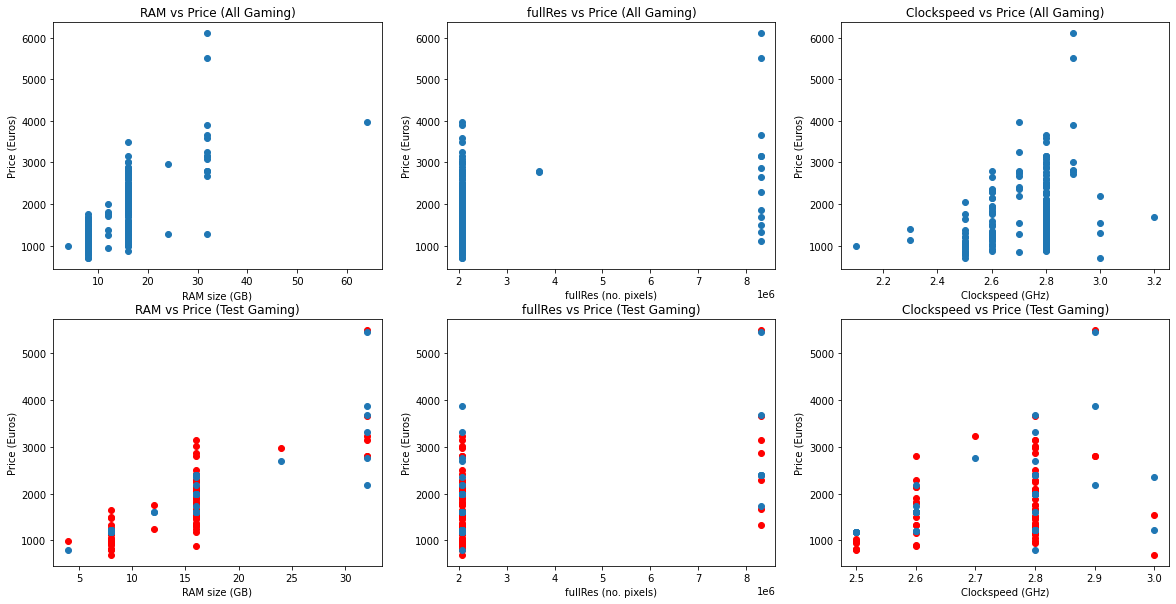

,Category,MSE,SSE,R2
0,Ultrabook,141696.313077,8.360082e+06,0.418513
1,Notebook,257636.618864,5.642242e+07,0.040150
2,Netbook,428464.306207,3.427714e+06,-1.062109
3,Gaming,198407.089186,1.230124e+07,0.736083


In [27]:
# Gaming
game_x = Gaming[['RAM', 'fullRes', 'Clockspeed']].values
game_y = Gaming['Price (Euros)'].values
game_x_train, game_x_test, game_y_train, game_y_test = train_test_split(game_x, game_y, test_size = 0.3, random_state = 2201798761)
degree = 3
game_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
game_model.fit(game_x_train, game_y_train)

game_pred = game_model.predict(game_x_test)
game_mse = mean_squared_error(game_y_test, game_pred)
game_sse = getSSE(game_pred, game_y_test)
game_r2 = r2_score(game_y_test, game_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(game_mse), '{:12f}'.format(game_sse), '{:<12f}'.format(game_r2))

plotResults(Gaming, "Gaming", game_y, game_x_test, game_y_test, game_pred)
append = pd.DataFrame({"Category":["Gaming"], "MSE":[game_mse], "SSE":[game_sse], "R2":[game_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
177442.699770 6387937.191712 0.425727    


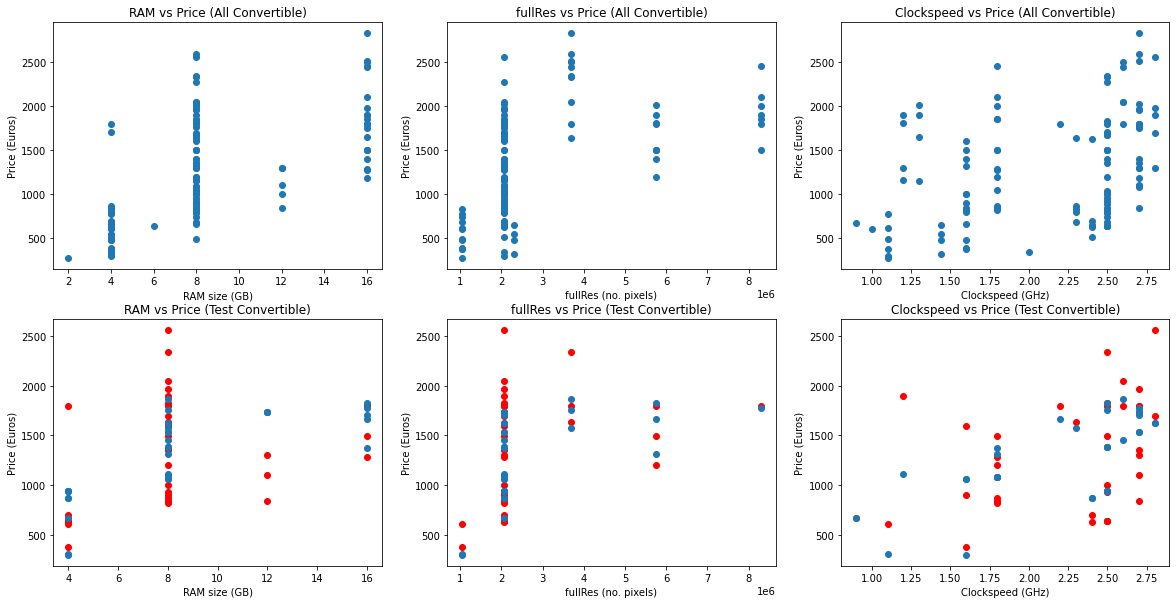

,Category,MSE,SSE,R2
0,Ultrabook,141696.313077,8.360082e+06,0.418513
1,Notebook,257636.618864,5.642242e+07,0.040150
2,Netbook,428464.306207,3.427714e+06,-1.062109
3,Gaming,198407.089186,1.230124e+07,0.736083
4,Convertible,177442.699770,6.387937e+06,0.425727


In [28]:
# Convertible
conv_x = Convertible[['RAM', 'fullRes', 'Clockspeed']].values
conv_y = Convertible['Price (Euros)'].values
conv_x_train, conv_x_test, conv_y_train, conv_y_test = train_test_split(conv_x, conv_y, test_size = 0.3, random_state = 2201798761)
degree = 3
conv_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
conv_model.fit(conv_x_train, conv_y_train)

conv_pred = conv_model.predict(conv_x_test)
conv_mse = mean_squared_error(conv_y_test, conv_pred)
conv_sse = getSSE(conv_pred, conv_y_test)
conv_r2 = r2_score(conv_y_test, conv_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(conv_mse), '{:12f}'.format(conv_sse), '{:<12f}'.format(conv_r2))

plotResults(Convertible, "Convertible", conv_y, conv_x_test, conv_y_test, conv_pred)
append = pd.DataFrame({"Category":["Convertible"], "MSE":[conv_mse], "SSE":[conv_sse], "R2":[conv_r2]})
results = results.append(append, ignore_index=True)
results

MSE           SSE           R2           
2591789024.305634 23326101218.750706 -11495.217501


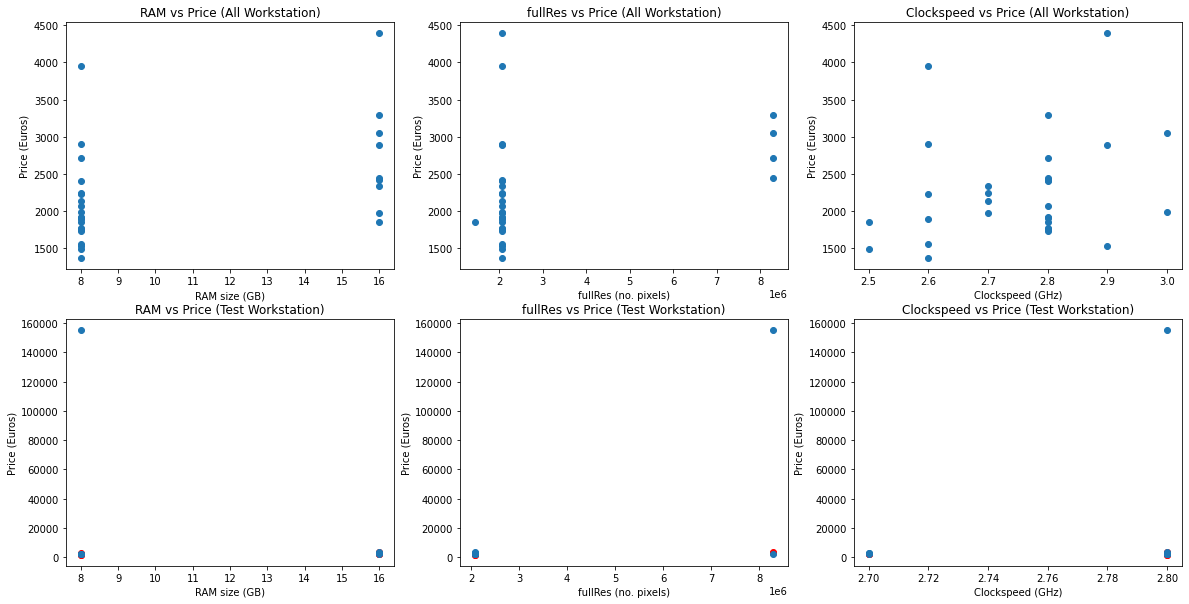

,Category,MSE,SSE,R2
0,Ultrabook,1.416963e+05,8.360082e+06,0.418513
1,Notebook,2.576366e+05,5.642242e+07,0.040150
2,Netbook,4.284643e+05,3.427714e+06,-1.062109
3,Gaming,1.984071e+05,1.230124e+07,0.736083
4,Convertible,1.774427e+05,6.387937e+06,0.425727
5,Workstation,2.591789e+09,2.332610e+10,-11495.217501


In [29]:
# Workstation
work_x = Workstation[['RAM', 'fullRes', 'Clockspeed']].values
work_y = Workstation['Price (Euros)'].values
work_x_train, work_x_test, work_y_train, work_y_test = train_test_split(work_x, work_y, test_size = 0.3, random_state = 2201798761)
degree = 3
work_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
work_model.fit(work_x_train, work_y_train)

work_pred = work_model.predict(work_x_test)
work_mse = mean_squared_error(work_y_test, work_pred)
work_sse = getSSE(work_pred, work_y_test)
work_r2 = r2_score(work_y_test, work_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(work_mse), '{:12f}'.format(work_sse), '{:<12f}'.format(work_r2))

plotResults(Workstation, "Workstation", work_y, work_x_test, work_y_test, work_pred)
append = pd.DataFrame({"Category":["Workstation"], "MSE":[work_mse], "SSE":[work_sse], "R2":[work_r2]})
results = results.append(append, ignore_index=True)
results